<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 4: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [ ]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [3]:
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [4]:
import seaborn as sns 

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

def regression_quality_metrics_report(y_true, y_pred):
    
    rmse = np.sqrt( mean_squared_error(y_true, y_pred) )
    mae = mean_absolute_error(y_true, y_pred)
    rse = np.sqrt( ( (y_true - y_pred)**2 ).sum() / ( (y_true - y_true.mean())**2 ).sum() )
    rae = np.abs( y_true - y_pred ).sum() / np.abs( y_true - y_true.mean() ).sum()
    mape = 100. / len(y_true) * np.abs( 1. - y_pred/y_true ).sum()
    rmsle = np.sqrt( mean_squared_log_error(y_true, y_pred) )
    
    return [rmse, mae, rse, rae, mape, rmsle]

metrics_report = pd.DataFrame(columns=['RMSE', 'MAE', 'RSE', 'RAE', 'MAPE', 'RMSLE'])

## Задание 1 (2 балла). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекоммендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [ ]:
# скачаем данные
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [8]:
# считаем файлы
ts1 = pd.read_csv('monthly-sunspots.csv')
ts2 = pd.read_csv('daily-total-female-births.csv')

In [ ]:
ts1.Month = pd.DatetimeIndex(ts1.Month)
ts1.index = pd.PeriodIndex(ts1.Month, freq='M')

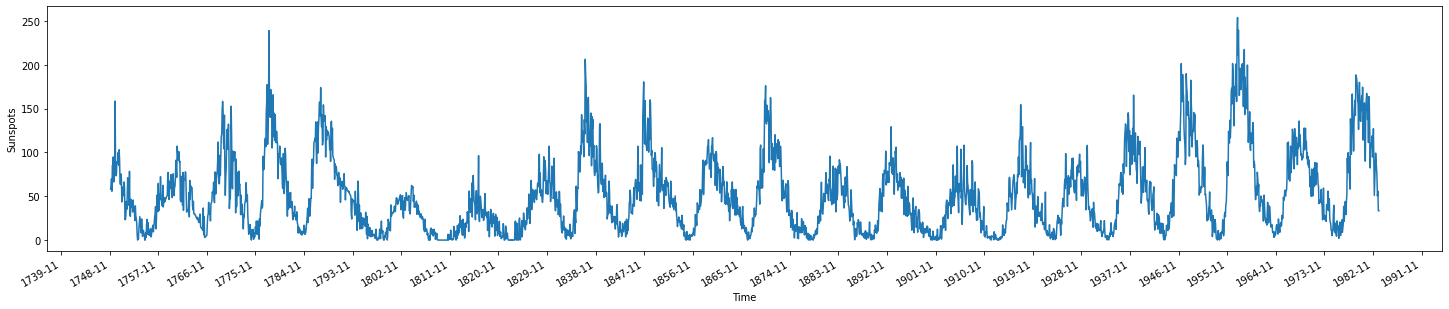

In [ ]:
ax = ts1.Sunspots.plot(figsize=(25,5), xlabel="Time", ylabel="Sunspots", x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=108))
plt.show()

In [9]:
ts2.Date = pd.DatetimeIndex(ts2.Date)
ts2.index = pd.PeriodIndex(ts2.Date, freq='D')

In [11]:
ts2['month'] = pd.DatetimeIndex(ts2['Date']).month
ts2['day'] = pd.DatetimeIndex(ts2['Date']).day

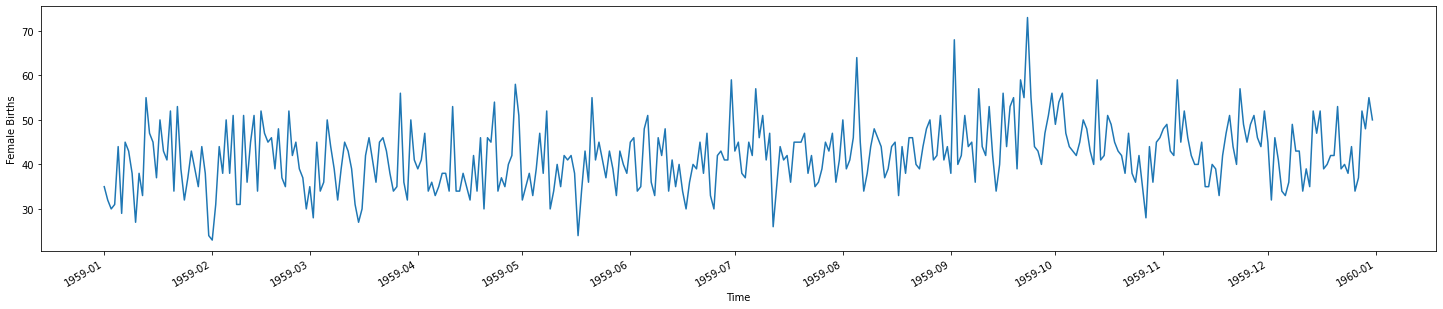

In [ ]:
ax = ts2.Births.plot(figsize=(25,5), xlabel="Time", ylabel="Female Births", x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.show()

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
train1, test1, = model_selection.train_test_split(ts1, test_size=0.2, shuffle=False)
train2, test2, = model_selection.train_test_split(ts2, test_size=0.2, shuffle=False)

In [ ]:
pd.plotting.register_matplotlib_converters()

## Задание 2. Анализ временных рядов (1 балла).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики автокорреляционных функций для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

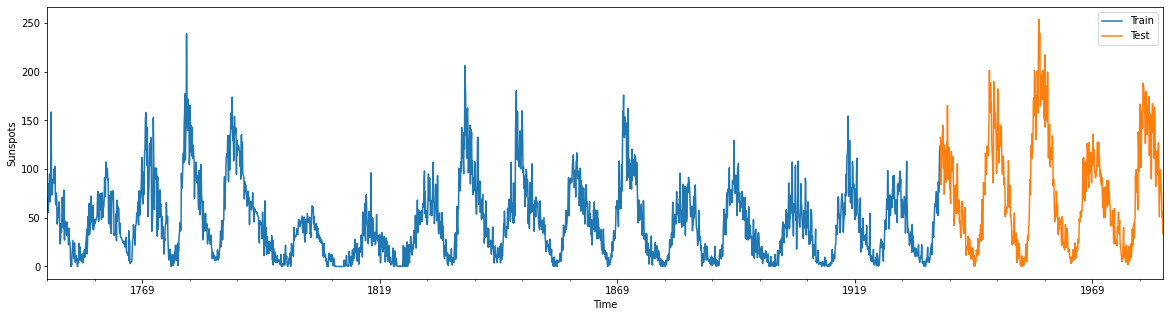

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
train1.Sunspots.plot(ax=ax, legend=False)
test1.Sunspots.plot(ax=ax, legend=False)
ax.set_ylabel("Sunspots")
ax.set_xlabel("Time")
ax.legend(["Train", "Test"])
plt.show()

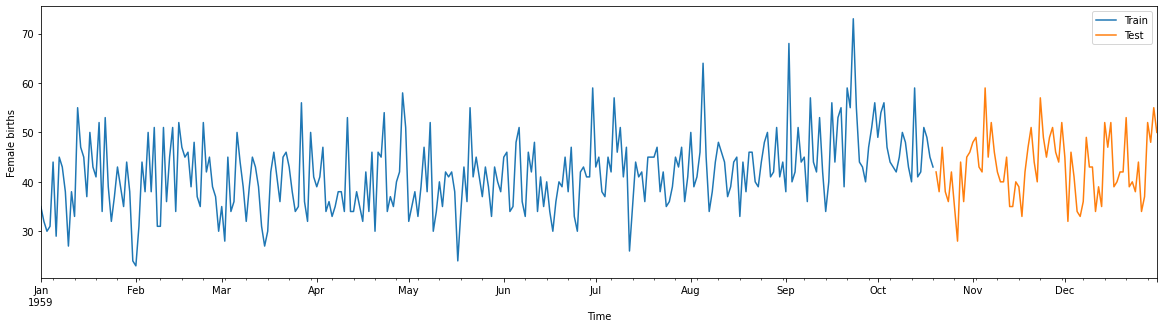

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
train2.Births.plot(ax=ax, legend=False)
test2.Births.plot(ax=ax, legend=False)
ax.set_ylabel("Female births")
ax.set_xlabel("Time")
ax.legend(["Train", "Test"])
plt.show()

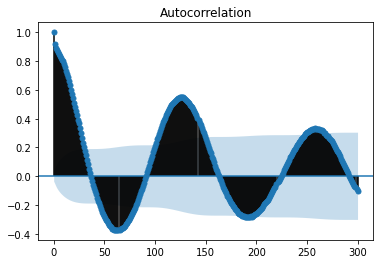

In [ ]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(ts1["Sunspots"], lags=300)

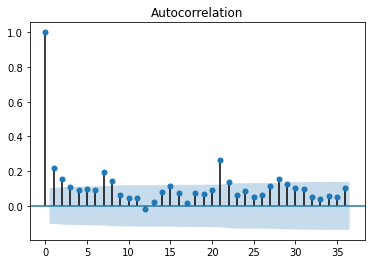

In [16]:
fig = tsaplots.plot_acf(ts2["Births"], lags=36)

In [ ]:
ts1['year'] = pd.DatetimeIndex(ts1['Month']).year
ts1['month'] = pd.DatetimeIndex(ts1['Month']).month

In [ ]:
ts1['decade'] = ts1.year.apply(lambda x: str(x)[:3]+'0')

In [ ]:
mdec = list(range(1,121))*23+list(range(1,61))    
ts1["mdec"] = mdec

In [ ]:
df_split = np.array_split(ts1, 4)
df0=df_split[0]
df1=df_split[1]
df2=df_split[2]
df3=df_split[3]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

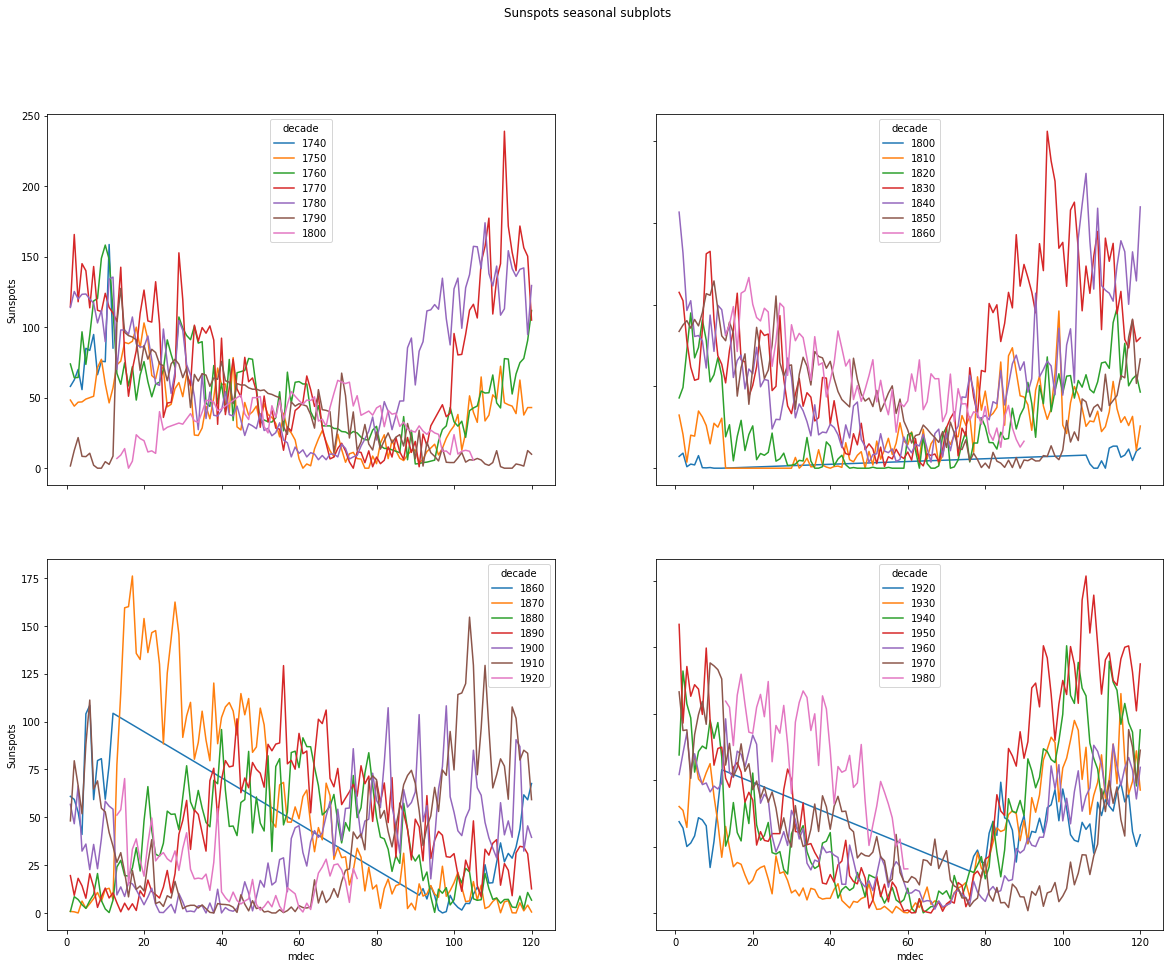

In [ ]:
variable = 'Sunspots'
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Sunspots seasonal subplots')
ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel('Sunspots', fontsize = 16)
sns.lineplot(df0['mdec'], df0[variable], hue=df0['decade'], ax=ax1)
sns.lineplot(df1['mdec'], df1[variable], hue=df1['decade'], ax=ax2)
sns.lineplot(df2['mdec'], df2[variable], hue=df2['decade'], ax=ax3)
sns.lineplot(df3['mdec'], df3[variable], hue=df3['decade'], ax=ax4)

for ax in fig.get_axes():
    ax.label_outer()

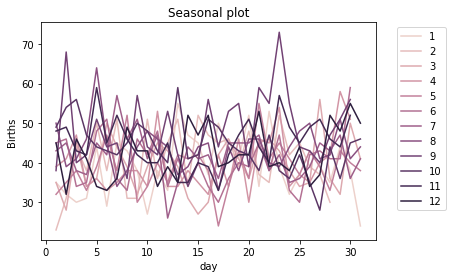

In [12]:
sns.lineplot(data=ts2, 
             x='day', 
             y='Births', 
             hue='month', 
             legend='full')

plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

## Задание 3. Предсказание месячного временного ряда (4.5 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.


### NaiveForecaster из sktime (0.5 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    MultiplexForecaster,
    TransformedTargetForecaster,
    make_reduction,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import (
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import (
    MeanAbsolutePercentageError,
    mean_absolute_percentage_error,
)
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd3a7303590>)

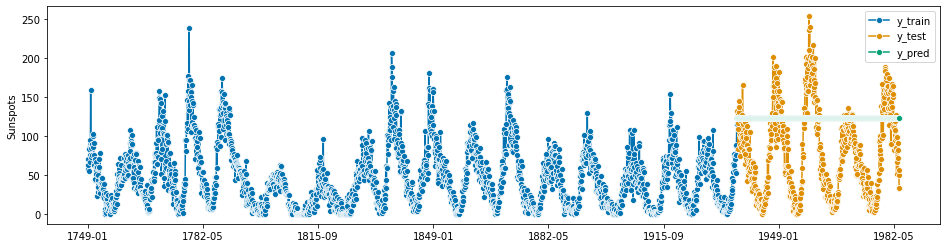

In [ ]:
forecaster = NaiveForecaster(strategy="last")
fh = ForecastingHorizon(test1.index, is_relative=False)
forecaster.fit(train1.Sunspots)
y_pred = forecaster.predict(fh)
plot_series(train1.Sunspots, test1.Sunspots, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
metrics_report.loc['Naive', :] = regression_quality_metrics_report(test1['Sunspots'].values, y_pred)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd3ba141dd0>)

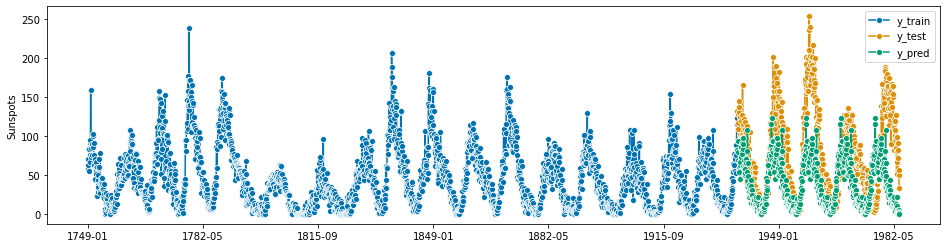

In [ ]:
forecaster = NaiveForecaster(strategy="last", sp=120)
forecaster.fit(train1.Sunspots)
y_pred = forecaster.predict(fh)
plot_series(train1.Sunspots, test1.Sunspots, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
metrics_report.loc['NaiveSeasonal', :] = regression_quality_metrics_report(test1['Sunspots'].values, y_pred)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885
NaiveSeasonal,60.0433,46.3784,1.09171,0.992138,110.041,1.22251


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [ ]:
model_AR1MA = ARIMA(order=(1,1,1), seasonal_order=(1,0,0,12), suppress_warnings=True)
r=model_AR1MA.fit(train1.Sunspots, disp = -1)

In [ ]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2256
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -9297.904
Date:                             Mon, 07 Jun 2021   AIC                          18605.809
Time:                                     09:45:53   BIC                          18634.413
Sample:                                          0   HQIC                         18616.248
                                            - 2256                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0141      0.111      0.127      0.899      -0.203       0.231
ar.L1          0.2222      0.029      7.620      0.000       0.165       0.279
ma.L1         -0.6634      0.023    -29.264      0.000      -0.708      -0.619
ar.S.L12       0.0393      0.018      2.234      0.025       0.005       0.074
sigma2       223.2915      3.962     56.353      0.000     215.525     231.058
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1489.83
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_pred, y_intervals = r.predict(fh, return_pred_int=True)

In [ ]:
predicted_df_arima = pd.DataFrame()
predicted_df_arima['Month'] = test1.Month
predicted_df_arima['prediction_5'] = y_intervals['lower'].values
predicted_df_arima['prediction'] = y_pred.values
predicted_df_arima['prediction_95'] = y_intervals['upper'].values

predicted_df_arima.head()

,Month,prediction_5,prediction,prediction_95
Month,,,,
1937-01,1937-01-01,79.902476,109.190100,138.477724
1937-02,1937-02-01,72.938394,106.487618,140.036842
1937-03,1937-03-01,69.749988,105.910914,142.071841
1937-04,1937-04-01,67.308034,105.686003,144.063971
1937-05,1937-05-01,64.442961,104.871925,145.300889


In [ ]:
from orbit.diagnostics.plot import plot_predicted_data

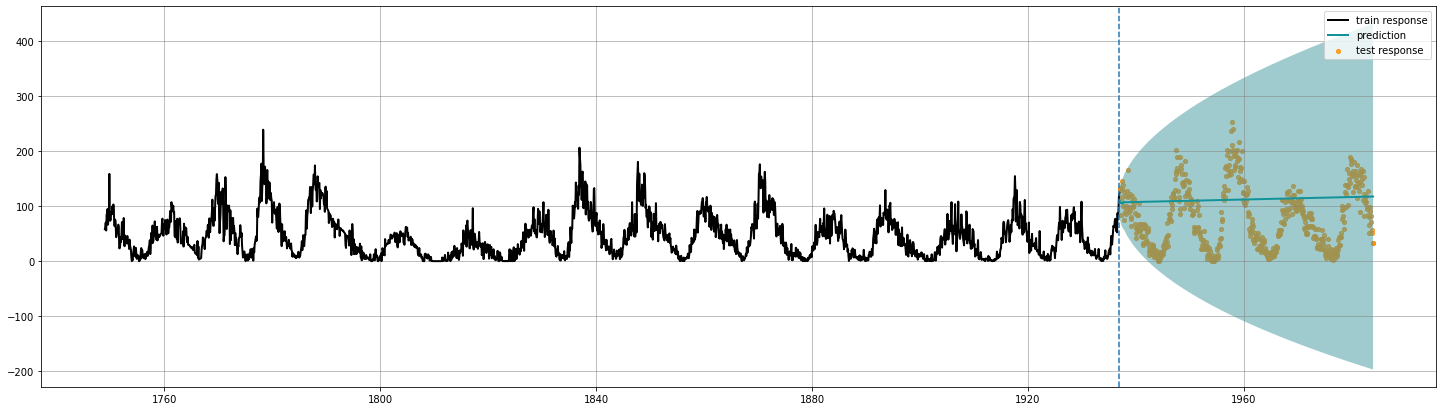

In [ ]:
plot_predicted_data(
    training_actual_df=train1, predicted_df=predicted_df_arima,
    actual_col="Sunspots", date_col="Month", 
    test_actual_df=test1, insample_line=True,  figsize=(25,7)
)

In [ ]:
metrics_report.loc['ARIMA', :] = regression_quality_metrics_report(test1['Sunspots'].values, predicted_df_arima['prediction'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885
NaiveSeasonal,60.0433,46.3784,1.09171,0.992138,110.041,1.22251
ARIMA,64.8585,55.2972,1.17926,1.18293,661.544,1.24991


С моей сезональностью (120) AutoArima отказывается работать с любыми гиперпараметрами и объемом данных (я сокращала), поэтому смотрим на годовых интервалах.

In [ ]:
forecaster = AutoARIMA(start_p=1, d=None, start_q=0, 
                       max_p=3, max_d=3, max_q=3, 
                       start_P=0, D=0, start_Q=0, 
                       max_P=1, max_D=1, max_Q=1, 
                       sp=12, suppress_warnings=True)

forecaster.fit(train1.Sunspots)

AutoARIMA(D=0, max_P=1, max_Q=1, max_d=3, max_p=3, max_q=3, sp=12, start_P=0,
          start_Q=0, start_p=1, start_q=0, suppress_warnings=True)

In [ ]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 2256
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -9296.605
Date:                              Sun, 06 Jun 2021   AIC                          18603.209
Time:                                      21:05:37   BIC                          18631.814
Sample:                                           0   HQIC                         18613.649
                                             - 2256                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4358      0.015    -28.547      0.000      -0.466      -0.406
ma.L2         -0.1202      0.015     -7.827      0.000      -0.150      -0.090
ar.S.L12      -0.8315      0.109     -7.611      0.000      -1.046      -0.617
ma.S.L12       0.8590      0.101      8.499      0.000       0.661       1.057
sigma2       223.0208      3.900     57.179      0.000     215.376     230.665
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1479.32
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
y_pred, y_intervals = forecaster.predict(fh, return_pred_int=True)

In [ ]:
predicted_df_arima = pd.DataFrame()
predicted_df_arima['Month'] = test1.Month
predicted_df_arima['prediction_5'] = y_intervals['lower'].values
predicted_df_arima['prediction'] = y_pred.values
predicted_df_arima['prediction_95'] = y_intervals['upper'].values

predicted_df_arima.head()

,Month,prediction_5,prediction,prediction_95
Month,,,,
1937-01,1937-01-01,79.403085,108.672957,137.942829
1937-02,1937-02-01,71.538163,105.145739,138.753316
1937-03,1937-03-01,69.827910,105.861341,141.894771
1937-04,1937-04-01,67.438801,105.744768,144.050734
1937-05,1937-05-01,64.815322,105.266353,145.717385


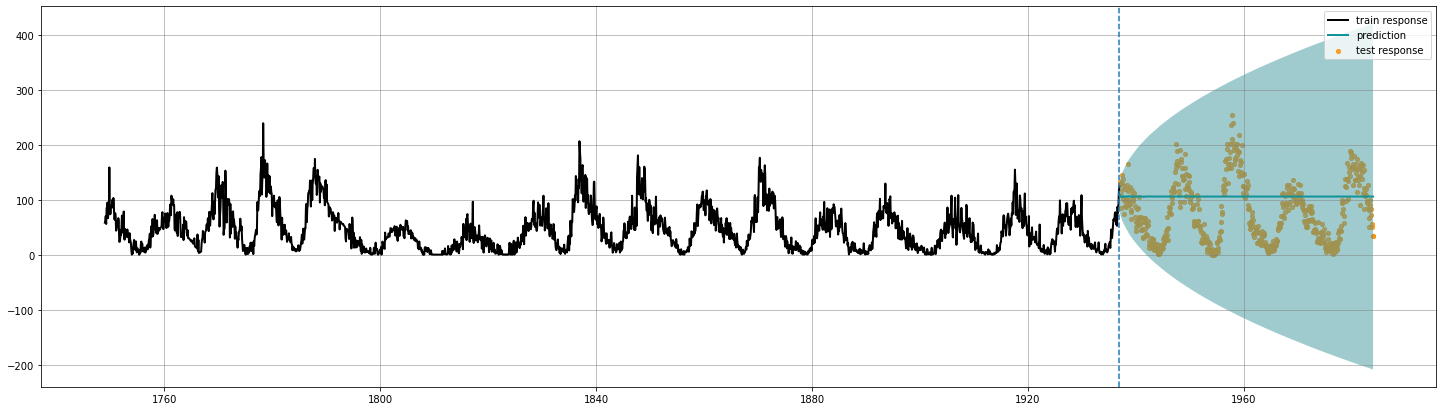

In [ ]:
plot_predicted_data(
    training_actual_df=train1, predicted_df=predicted_df_arima,
    actual_col="Sunspots", date_col="Month", 
    test_actual_df=test1, insample_line=True,  figsize=(25,7)
)

In [ ]:
metrics_report.loc['AutoARIMA', :] = regression_quality_metrics_report(test1['Sunspots'].values, predicted_df_arima['prediction'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885
NaiveSeasonal,60.0433,46.3784,1.09171,0.992138,110.041,1.22251
ARIMA,64.8585,55.2972,1.17926,1.18293,661.544,1.24991
AutoARIMA,61.6873,52.6523,1.1216,1.12635,627.677,1.21727


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [ ]:
from orbit.models.lgt import LGTFull
from orbit.models.dlt import DLTFull

In [ ]:
dlt = DLTFull(
    response_col='Sunspots', 
    date_col='Month',
    seasonality=120,
)

# обучаем модель
dlt.fit(df=train1)

# делаем прогноз
predicted_df = dlt.predict(df=test1)

# выводим таблицу прогноза
predicted_df.head()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b0a449c7523386cce384e92a998e71c8 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


,Month,prediction_5,prediction,prediction_95
0,1937-01-01,89.811656,111.798452,135.786726
1,1937-02-01,88.229612,110.793684,140.341738
2,1937-03-01,77.335335,114.279451,140.118213
3,1937-04-01,79.625559,110.827851,142.101559
4,1937-05-01,76.785507,112.072524,138.049267


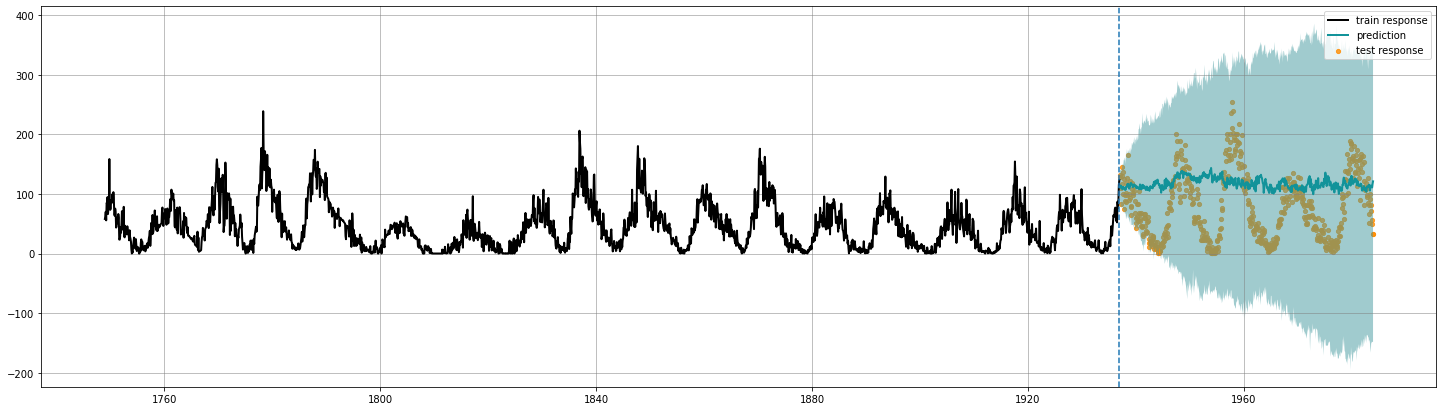

In [ ]:
plot_predicted_data(
    training_actual_df=train1, predicted_df=predicted_df,
    actual_col="Sunspots", date_col="Month", 
    test_actual_df=test1, insample_line=True, figsize=(25,7)
)

In [ ]:
metrics_report.loc['DLT', :] = regression_quality_metrics_report(test1['Sunspots'].values, predicted_df['prediction'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885
NaiveSeasonal,60.0433,46.3784,1.09171,0.992138,110.041,1.22251
ARIMA,64.8585,55.2972,1.17926,1.18293,661.544,1.24991
AutoARIMA,61.6873,52.6523,1.1216,1.12635,627.677,1.21727
DLT,67.898,57.1191,1.23452,1.22191,738.71,1.28072


In [ ]:
lgt = LGTFull(
    response_col='Sunspots', 
    date_col='Month',
    seasonality=120,
    seed=8888,
)

# обучаем модель
lgt.fit(df=train1)

# делаем прогноз
predicted_df = lgt.predict(df=test1)

# выводим таблицу прогноза
predicted_df.head()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2af9ff5e07f97061bbe4badb0f8a2e36 NOW.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


,Month,prediction_5,prediction,prediction_95
0,1937-01-01,80.593537,108.287662,129.371765
1,1937-02-01,76.177211,104.580793,134.559285
2,1937-03-01,80.146473,103.912510,133.477088
3,1937-04-01,66.247859,99.312884,129.352732
4,1937-05-01,69.267558,103.700485,131.989624


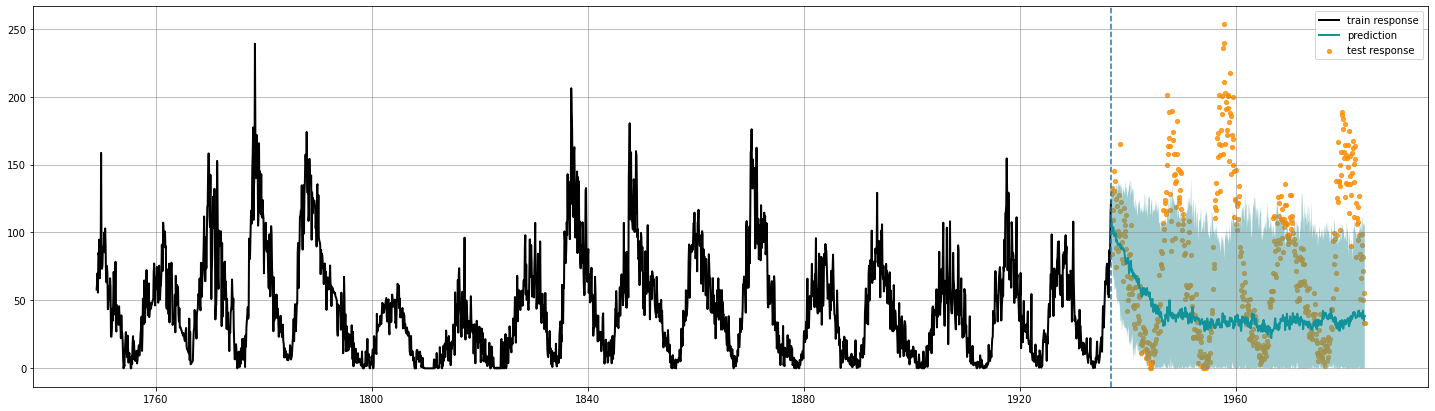

In [ ]:
plot_predicted_data(
    training_actual_df=train1, predicted_df=predicted_df,
    actual_col="Sunspots", date_col="Month", 
    test_actual_df=test1, insample_line=True,  figsize=(25,7)
)

In [ ]:
metrics_report.loc['LGT', :] = regression_quality_metrics_report(test1['Sunspots'].values, predicted_df['prediction'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885
NaiveSeasonal,60.0433,46.3784,1.09171,0.992138,110.041,1.22251
ARIMA,64.8585,55.2972,1.17926,1.18293,661.544,1.24991
AutoARIMA,61.6873,52.6523,1.1216,1.12635,627.677,1.21727
DLT,67.898,57.1191,1.23452,1.22191,738.71,1.28072
LGT,67.4584,50.4875,1.22653,1.08004,232.658,1.07869


### ETS (2 балла).

Обучите из библиотеки `sklearn` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing as ep
from sktime.forecasting.ets import AutoETS


In [ ]:
train11=train1.replace({'Sunspots': {0: 0.0001}})

In [ ]:
forecaster = ep(trend='add', seasonal='mul', sp=120)
forecaster.fit(train11.Sunspots)
y_pred = forecaster.predict(fh)

In [ ]:
predicted_df = pd.DataFrame()
predicted_df['Month'] = test1.Month
predicted_df['prediction'] = y_pred.values

predicted_df.head()

,Month,prediction
Month,,
1937-01,1937-01-01,127.234395
1937-02,1937-02-01,121.994822
1937-03,1937-03-01,110.426049
1937-04,1937-04-01,108.559078
1937-05,1937-05-01,110.393197


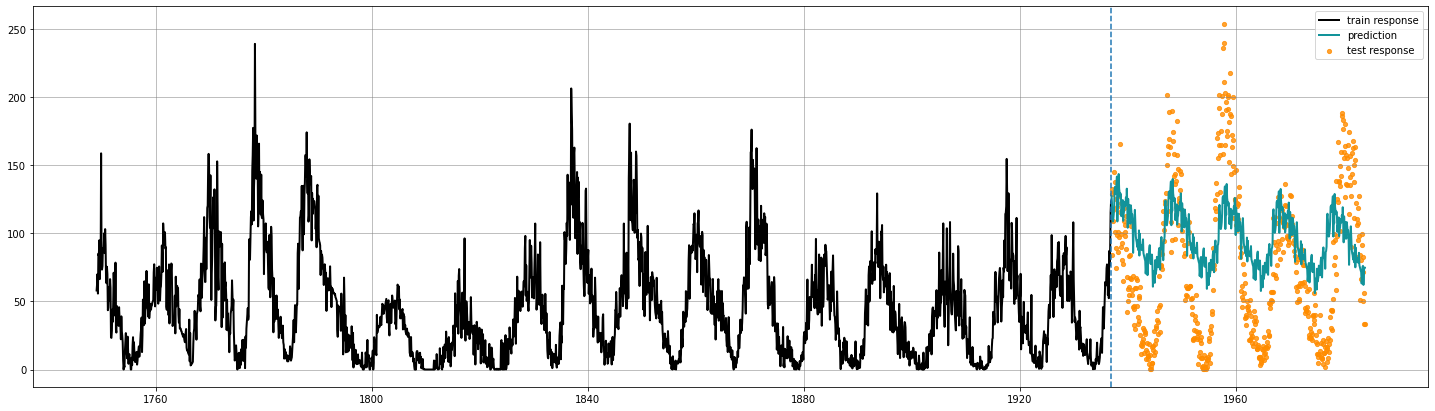

In [ ]:
plot_predicted_data(
    training_actual_df=train1, predicted_df=predicted_df,
    actual_col="Sunspots", date_col="Month", 
    test_actual_df=test1, insample_line=True, figsize=(25,7)
)

In [ ]:
metrics_report.loc['ETS', :] = regression_quality_metrics_report(test1['Sunspots'].values, predicted_df['prediction'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885
NaiveSeasonal,60.0433,46.3784,1.09171,0.992138,110.041,1.22251
ARIMA,64.8585,55.2972,1.17926,1.18293,661.544,1.24991
AutoARIMA,61.6873,52.6523,1.1216,1.12635,627.677,1.21727
DLT,67.898,57.1191,1.23452,1.22191,738.71,1.28072
LGT,67.4584,50.4875,1.22653,1.08004,232.658,1.07869
ETS,48.8285,41.9112,0.887799,0.896576,473.244,1.06337


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

Рисую графики с интервалами после каждого предсказания, лучшая модель – ETS

In [ ]:
forecaster = AutoETS(auto=True, n_jobs=-1, sp=120)
forecaster.fit(train11.Sunspots)
y_pred = forecaster.predict(fh)

In [ ]:
predicted_df = pd.DataFrame()
predicted_df['Month'] = test1.Month
predicted_df['prediction'] = y_pred.values

predicted_df.head()

,Month,prediction
Month,,
1937-01,1937-01-01,111.142409
1937-02,1937-02-01,111.142409
1937-03,1937-03-01,111.142409
1937-04,1937-04-01,111.142409
1937-05,1937-05-01,111.142409


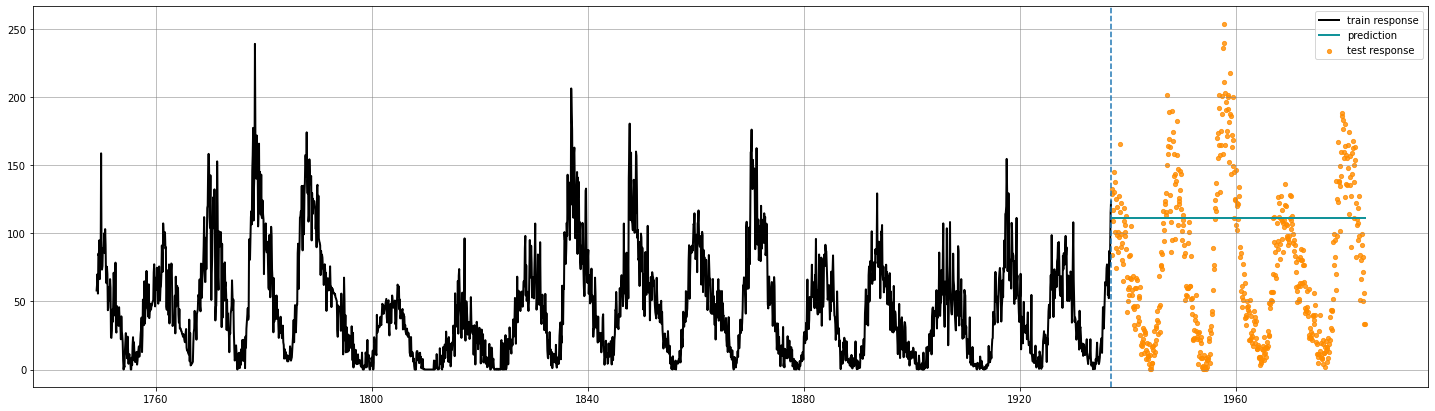

In [ ]:
plot_predicted_data(
    training_actual_df=train1, predicted_df=predicted_df,
    actual_col="Sunspots", date_col="Month", 
    test_actual_df=test1, insample_line=True, figsize=(25,7)
)

In [ ]:
metrics_report.loc['AutoETS', :] = regression_quality_metrics_report(test1['Sunspots'].values, predicted_df['prediction'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,71.5265,61.0548,1.30049,1.3061,741.223,1.30885
NaiveSeasonal,60.0433,46.3784,1.09171,0.992138,110.041,1.22251
ARIMA,64.8585,55.2972,1.17926,1.18293,661.544,1.24991
AutoARIMA,61.6873,52.6523,1.1216,1.12635,627.677,1.21727
DLT,67.898,57.1191,1.23452,1.22191,738.71,1.28072
LGT,67.4584,50.4875,1.22653,1.08004,232.658,1.07869
ETS,48.8285,41.9112,0.887799,0.896576,473.244,1.06337
AutoETS,64.3836,54.8768,1.17062,1.17394,662.609,1.24593


## Задание 4. Предсказание дневного временного ряда (2.5 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (0.5 балла).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,6.42342,5.23288,1.00001,0.999642,12.5755,0.147999
NaiveSeasonal,11.1035,8.24658,1.72861,1.57535,20.5085,0.226702


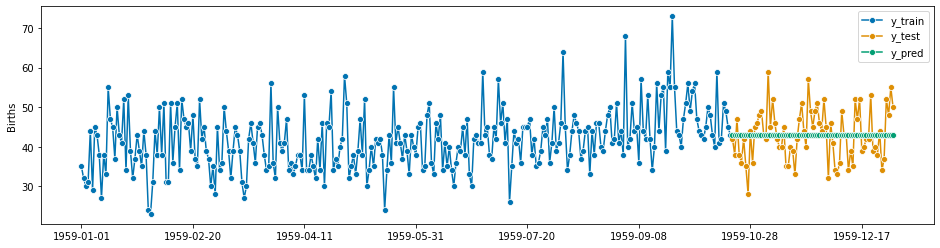

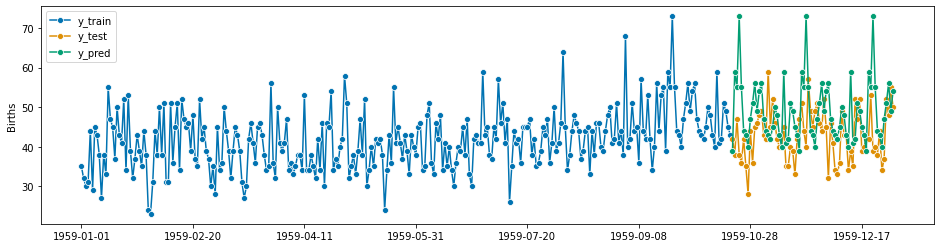

In [ ]:
metrics_report = pd.DataFrame(columns=['RMSE', 'MAE', 'RSE', 'RAE', 'MAPE', 'RMSLE'])
fh = ForecastingHorizon(test2.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(train2.Births)
y_pred = forecaster.predict(fh)
plot_series(train2.Births, test2.Births, y_pred, labels=["y_train", "y_test", "y_pred"])

metrics_report.loc['Naive', :] = regression_quality_metrics_report(test2['Births'].values, y_pred)
metrics_report

forecaster = NaiveForecaster(strategy="last", sp=30)
forecaster.fit(train2.Births)
y_pred = forecaster.predict(fh)
plot_series(train2.Births, test2.Births, y_pred, labels=["y_train", "y_test", "y_pred"])

metrics_report.loc['NaiveSeasonal', :] = regression_quality_metrics_report(test2['Births'].values, y_pred)
metrics_report

### KTR из orbit (1 балл).



In [ ]:
from orbit.models.ktrlite import KTRLiteMAP

In [ ]:
ktrlite = KTRLiteMAP(
    response_col='Births',
    date_col='Date',
    seasonality=30,
    level_knot_scale=.1,
    span_level=.05,
)

In [ ]:
ktrlite.fit(train2)
predicted_df = ktrlite.predict(df=test2)
predicted_df.head()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_54eae5ecf2d426f33baa7b746b329122 NOW.


,Date,prediction_5,prediction,prediction_95
0,1959-10-20,29.312880,41.437515,53.307881
1,1959-10-21,29.775785,41.362719,53.376140
2,1959-10-22,29.302444,41.208219,52.859180
3,1959-10-23,29.277386,40.998356,52.561646
4,1959-10-24,28.818003,40.765986,52.500729


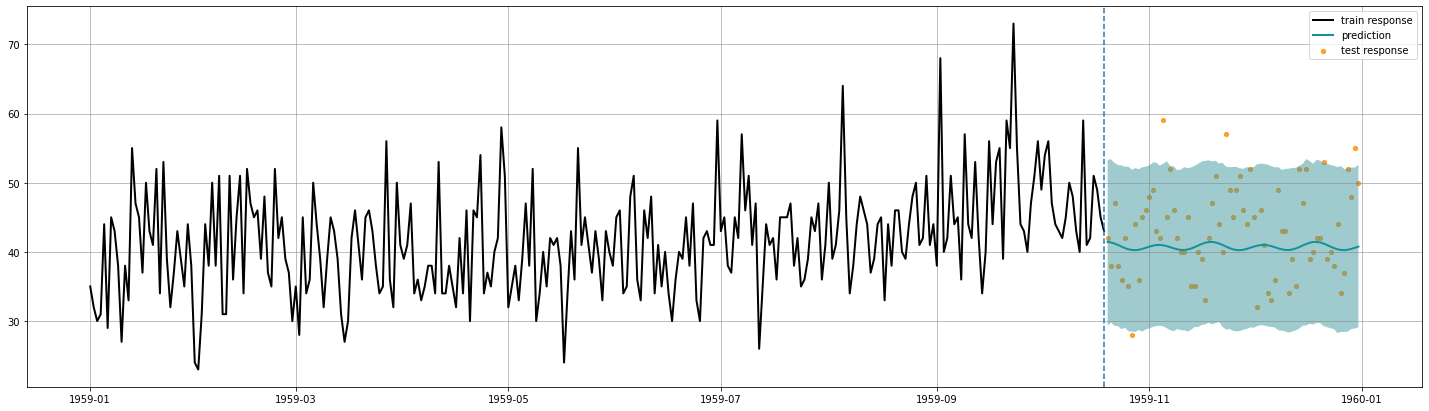

In [ ]:
plot_predicted_data(
    training_actual_df=train2, predicted_df=predicted_df,
    actual_col="Births", date_col="Date", 
    test_actual_df=test2, insample_line=True, figsize=(25,7)
)

In [ ]:
metrics_report.loc['KTR', :] = regression_quality_metrics_report(test2['Births'].values, predicted_df['prediction'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,6.42342,5.23288,1.00001,0.999642,12.5755,0.147999
NaiveSeasonal,11.1035,8.24658,1.72861,1.57535,20.5085,0.226702
KTR,6.80983,5.49664,1.06017,1.05003,12.5281,0.153399


### Phophet (1 балл).



In [ ]:
from prophet import Prophet

In [ ]:
train_df = train2[['Date', 'Births']]
train_df.columns = ['ds', 'y']

train_df.head()

,ds,y
Date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [ ]:
model = Prophet(interval_width=0.9)
model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
test_df = test2[['Date', 'Births']]
test_df.columns = ['ds', 'y']

test_df.head()

,ds,y
Date,,
1959-10-20,1959-10-20,42
1959-10-21,1959-10-21,38
1959-10-22,1959-10-22,47
1959-10-23,1959-10-23,38
1959-10-24,1959-10-24,36


In [ ]:
forecast = model.predict(test_df)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1959-10-20,47.779636,39.008321,62.038858,47.779636,47.779636,2.499319,2.499319,2.499319,2.499319,2.499319,2.499319,0.0,0.0,0.0,50.278955
1,1959-10-21,47.833983,39.041604,61.737857,47.833451,47.834417,2.346268,2.346268,2.346268,2.346268,2.346268,2.346268,0.0,0.0,0.0,50.180251
2,1959-10-22,47.888330,37.138539,59.426257,47.886228,47.890155,0.792648,0.792648,0.792648,0.792648,0.792648,0.792648,0.0,0.0,0.0,48.680978
3,1959-10-23,47.942677,35.730155,59.604284,47.938294,47.946086,0.142802,0.142802,0.142802,0.142802,0.142802,0.142802,0.0,0.0,0.0,48.085479
4,1959-10-24,47.997024,35.827283,58.577345,47.990896,48.001927,-0.459754,-0.459754,-0.459754,-0.459754,-0.459754,-0.459754,0.0,0.0,0.0,47.537270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1959-12-27,51.475225,37.783778,59.009693,51.103121,51.821105,-3.323239,-3.323239,-3.323239,-3.323239,-3.323239,-3.323239,0.0,0.0,0.0,48.151985
69,1959-12-28,51.529571,38.738498,60.261163,51.149491,51.884442,-1.998043,-1.998043,-1.998043,-1.998043,-1.998043,-1.998043,0.0,0.0,0.0,49.531528
70,1959-12-29,51.583918,42.840277,64.379527,51.196154,51.945578,2.499319,2.499319,2.499319,2.499319,2.499319,2.499319,0.0,0.0,0.0,54.083237
71,1959-12-30,51.638265,43.687593,65.799925,51.244411,52.009510,2.346268,2.346268,2.346268,2.346268,2.346268,2.346268,0.0,0.0,0.0,53.984533


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

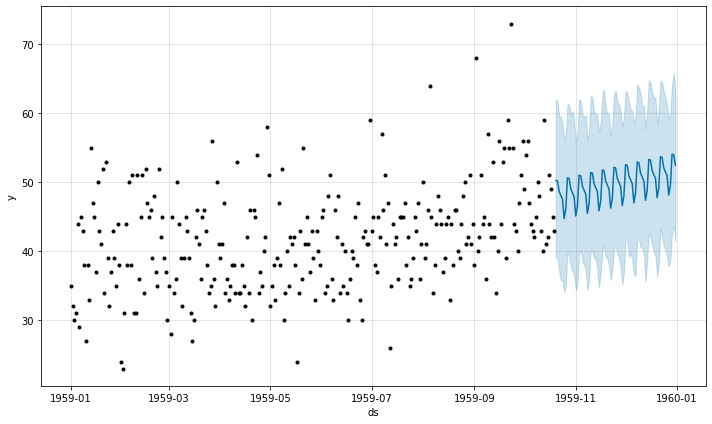

In [ ]:
fig1 = model.plot(forecast)

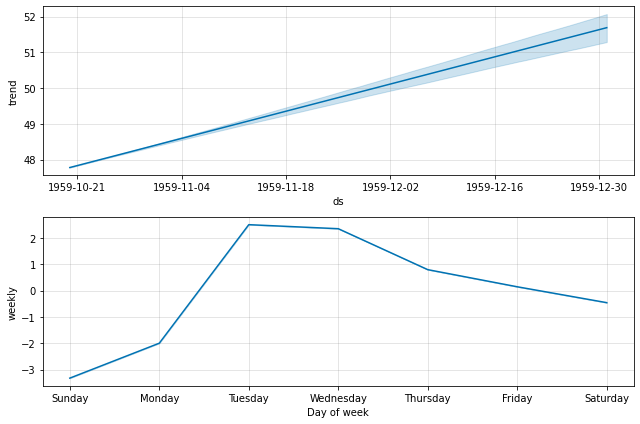

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
metrics_report.loc['Prophet', :] = regression_quality_metrics_report(test2['Births'].values, forecast['yhat'].values)
metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
Naive,6.42342,5.23288,1.00001,0.999642,12.5755,0.147999
NaiveSeasonal,11.1035,8.24658,1.72861,1.57535,20.5085,0.226702
KTR,6.80983,5.49664,1.06017,1.05003,12.5281,0.153399
Prophet,9.52581,8.03261,1.483,1.53448,20.7165,0.21572


Лучший по MAE – Naive, график выше (но при прошлом выполнении кода был KTR, ых)

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытай свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной на тестовой выборке с помощью MAE. 

